In [43]:
import pandas as pd
import bt
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import talib

In [2]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
country_code = 'USA'

## Alternate Dataset - Inflation Dataset
Data Downloaded from "https://data.worldbank.org/indicator/FR.INR.RINR?locations=US" 
<br/>Loaded into a pandas dataset & Visualize the Inflation of United States over the years

In [4]:
# Inflation Data for all countries
raw_inflation_data = pd.read_excel('./data/country_inflation_data.xls', skiprows=3)
raw_inflation_data.drop(columns=['Country Name', 'Indicator Name', 'Indicator Code'], inplace=True)

### Santize the data

In [5]:
# Structure the Data so that it can be interpreted easily
df_inflation_data = pd.melt(raw_inflation_data, id_vars=['Country Code'], var_name="Year", value_name="Inflation")
df_inflation_data.index = df_inflation_data['Country Code']
df_inflation_data['Year'] = df_inflation_data['Year'].astype('int')
df_inflation_data.drop(columns=['Country Code'], inplace=True)
df_inflation_data.dropna(inplace=True)
df_inflation_data.tail(5)

,Year,Inflation
Country Code,,
VNM,2021,1.834716
WLD,2021,3.423629
WSM,2021,3.133205
XKX,2021,3.353691
ZAF,2021,4.611672


### Plot of US Inflation Over the Years

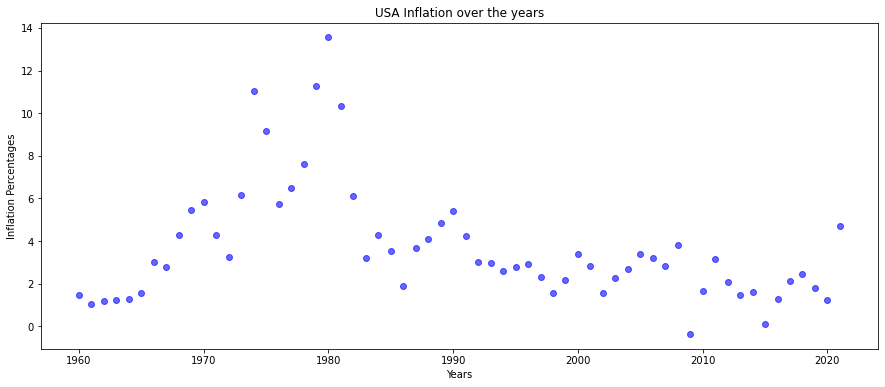

In [6]:
plt.figure(figsize=(15,6))
usa_inflation_data = df_inflation_data.loc[country_code][['Year','Inflation']]
plt.title("USA Inflation over the years")
plt.xlabel('Years')
plt.ylabel('Inflation Percentages')
plt.scatter(data=usa_inflation_data, x='Year', y='Inflation', color='blue', alpha=0.6)
plt.show()


## Interest Rates Dataset
How has the Federal Reserve responded to the Inflationary Pressures?<br/>
It can come evident from the interest rate dataset.<br/>
Loading the interest rate database and visually Ploting them<br/>
Data Downloaded from https://data.worldbank.org/indicator/FR.INR.RINR?locations=US


In [7]:
# Inflation Data for all countries
raw_interest_data = pd.read_excel('./data/country_interest_rates.xls', skiprows=3)
raw_interest_data.drop(columns=['Country Name', 'Indicator Name', 'Indicator Code'], inplace=True)

### Santize the data

In [8]:
# Structure the Data so that it can be interpreted easily
df_interest_data = pd.melt(raw_interest_data, id_vars=['Country Code'], var_name="Year", value_name="InterestRates")
df_interest_data.index = df_interest_data['Country Code']
df_interest_data['Year'] = df_interest_data['Year'].astype('int')
df_interest_data.drop(columns=['Country Code'], inplace=True)
df_interest_data.dropna(inplace=True)
df_interest_data.tail(5)

,Year,InterestRates
Country Code,,
VUT,2020,0.277822
WSM,2020,8.471778
ZAF,2020,2.313127
ZMB,2020,-3.749081
ZWE,2020,-79.803157


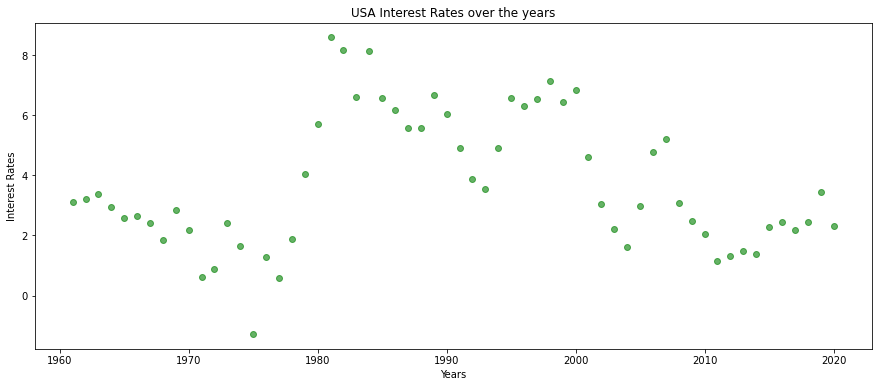

In [79]:
# Inflation Data for USA
plt.figure(figsize=(15,6))
usa_interest_data = df_interest_data.loc[country_code][['Year','InterestRates']]
plt.title("USA Interest Rates over the years")
plt.xlabel('Years')
plt.ylabel('Interest Rates')
plt.scatter(data=usa_interest_data, x='Year', y='InterestRates', color='green', alpha=0.6)
plt.show()


### Merge Inflation and Interest Rate Datasets 
Merging interest rates and inflation data in to a single dataframe so that we can fetch the correlation

In [10]:
usa_inflation_interest_df = pd.merge(usa_inflation_data, usa_interest_data, on=["Year"])
usa_inflation_interest_df.index = usa_inflation_interest_df['Year']
usa_inflation_interest_df['Interest_Rate_Next_Year'] = usa_inflation_interest_df["Year"].apply(lambda x: (usa_inflation_interest_df.loc[x+1]["InterestRates"]) if x < 2020 else 0.0)
usa_inflation_interest_df = usa_inflation_interest_df.drop(columns=['Year'])
usa_inflation_interest_df['Interest_Rate_Next_Year'] = usa_inflation_interest_df['Interest_Rate_Next_Year'].astype("float")
usa_inflation_interest_df.tail(5)


,Inflation,InterestRates,Interest_Rate_Next_Year
Year,,,
2016,1.261583,2.436851,2.175694
2017,2.130110,2.175694,2.444494
2018,2.442583,2.444494,3.436010
2019,1.812210,3.436010,2.311111
2020,1.233584,2.311111,0.000000


In [11]:
inflation_interest_correlation = usa_inflation_interest_df.corr(method='pearson')
inflation_interest_correlation

,Inflation,InterestRates,Interest_Rate_Next_Year
Inflation,1.000000,0.076389,0.179262
InterestRates,0.076389,1.000000,0.856736
Interest_Rate_Next_Year,0.179262,0.856736,1.000000


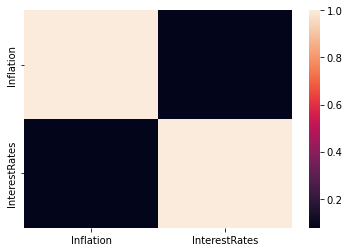

In [12]:
# Plot the heatmap signifying the correlation between Inflation & Interest Rates
sns.heatmap(usa_inflation_interest_df[['Inflation', 'InterestRates']].corr())
plt.show()

### Correlation between interest rates and inflation

We don't see a  string correlation between interest rates and inflation and infact we see some cases same side movement and in some cases an opposite movement as depicted in the graph below

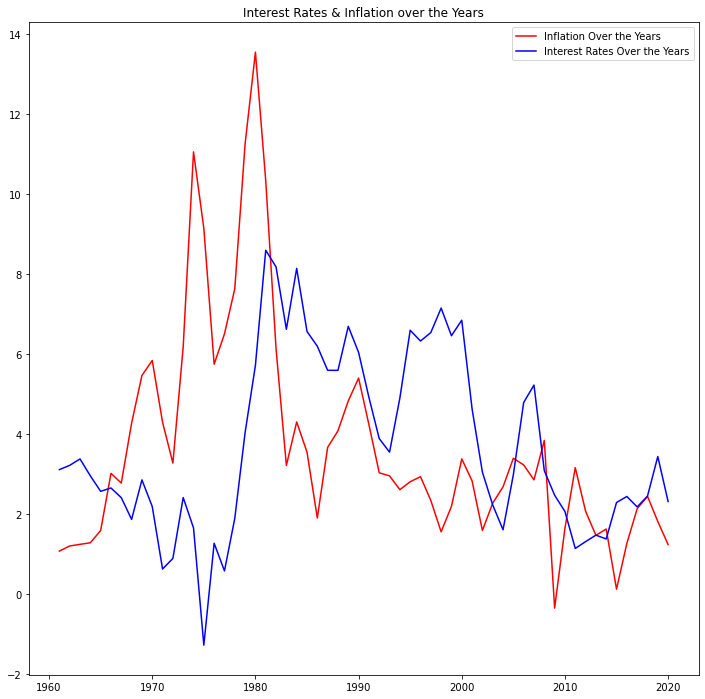

In [13]:
plt.figure(figsize=(12,12))
plt.plot(usa_inflation_interest_df['Inflation'], color='red', label='Inflation Over the Years')
plt.plot(usa_inflation_interest_df['InterestRates'], color='blue', label='Interest Rates Over the Years')
plt.title("Interest Rates & Inflation over the Years")
plt.legend()
plt.show()

In [83]:
# Top 5 Stocks
raw_stocks_data = pd.read_excel('./data/sp500_historic_data.xlsx')
usa_inflation_interest_df = pd.merge(usa_inflation_interest_df, raw_stocks_data, on=["Year"])

,Year,Inflation,InterestRates,Interest_Rate_Next_Year,Top5
0,1989,4.827003,6.690687,6.039749,"GM,F,XOM,IBM,GE"
1,1990,5.397956,6.039749,4.915346,"GM,F,XOM,IBM,GE"
2,1991,4.234964,4.915346,3.884238,"GM,F,XOM,IBM,GE"
3,1992,3.028820,3.884238,3.545617,"GM,F,XOM,IBM,GE"
4,1993,2.951657,3.545617,4.898310,"GM,F,XOM,IBM,GE"
5,1994,2.607442,4.898310,6.593996,"GM,F,XOM,IBM,GE"
6,1995,2.805420,6.593996,6.324074,"GM,F,XOM,IBM,GE"
7,1996,2.931204,6.324074,6.536615,"GM,F,XOM,IBM,GE"
8,1997,2.337690,6.536615,7.148192,"GM,F,XOM,IBM,GE"
9,1998,1.552279,7.148192,6.457135,"GM,F,XOM,IBM,GE"


## Constants

In [14]:
index_tickers = '^RUA, ^GSPC'
index_ticker_column_mapper = {'gspc': 'SP500', 'rua': 'Russell3000'}
target_inflation_metric = '7'
start_date = '1988-01-01'

## Indexes Investment Strategy
### Allocating portfolio across S&P 500, Russell 3000 companies

S&P 500 - Top 500 Companies in US Markets launched in 1923 tracking 90 stocks, expanded to 500 stocks from 1957
RUA - Russell Top 3000 companies launched in 1984 tracks top 3000 companies

In [15]:
def fetch_price_data(tickers, start_date):
    raw_price_data = bt.get(tickers, start = start_date)
    return raw_price_data

In [16]:
# Price Data for the two indices SP500 &Rusell 3000 index.
price_data = fetch_price_data(index_tickers, start_date)
price_data.rename(columns = index_ticker_column_mapper, inplace=True)

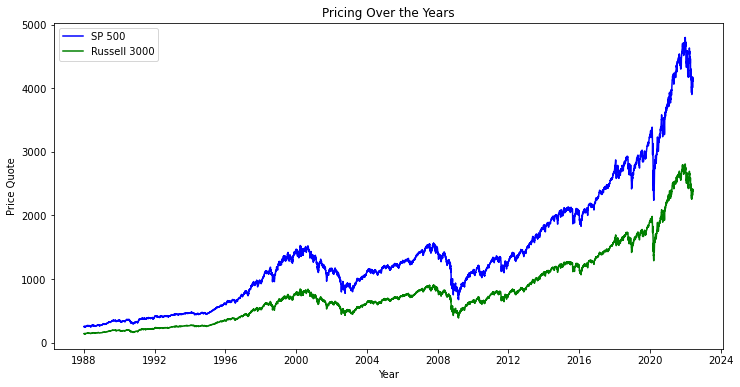

In [17]:
# Plot Price Data
plt.figure(figsize=(12,6))
plt.xlabel("Year")
plt.ylabel("Price Quote")
plt.title('Pricing Over the Years')
plt.plot(price_data['SP500'], color='blue', label='SP 500')
plt.plot(price_data['Russell3000'], color='green', label='Russell 3000')
plt.legend()
plt.show()

### Merge Inflation, Interest Rates data with SP500 and Russell 3000 Pricing Data

In [18]:
price_data['year'] = pd.DatetimeIndex(price_data.index).year
year_wise_df = price_data.groupby(by='year').agg(
    {'SP500' : 'mean', 'Russell3000': 'mean'})
year_wise_df['Year'] = year_wise_df.index
year_wise_df = pd.merge(usa_inflation_interest_df, 
                        year_wise_df, 
                        on=["Year"])

In [19]:
year_wise_df.head()

,Year,Inflation,InterestRates,Interest_Rate_Next_Year,SP500,Russell3000
0,1988,4.077741,5.590382,6.690687,265.880158,151.341383
1,1989,4.827003,6.690687,6.039749,323.051429,182.767937
2,1990,5.397956,6.039749,4.915346,334.632056,184.698656
3,1991,4.234964,4.915346,3.884238,376.186324,209.323874
4,1992,3.028820,3.884238,3.545617,415.747008,234.955552


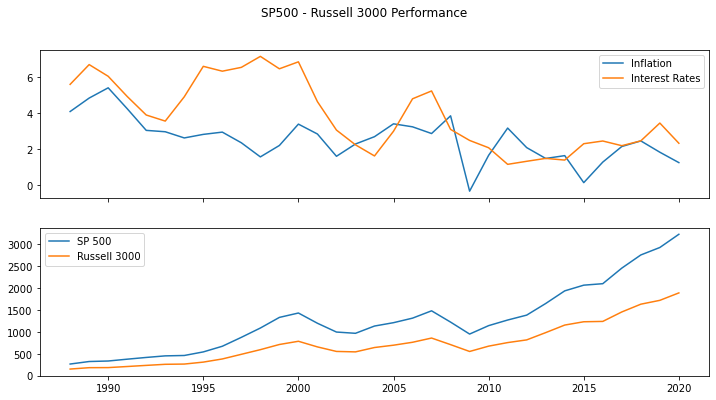

In [80]:
fig, axs = plt.subplots(2, figsize=(12,6))
fig.figsize = (24,25)
fig.suptitle('SP500 - Russell 3000 Performance')
axs[1].plot(year_wise_df['Year'], year_wise_df['SP500'], label='SP 500')
axs[1].plot(year_wise_df['Year'], year_wise_df['Russell3000'], label='Russell 3000')
axs[1].legend()
axs[0].plot(year_wise_df['Year'], year_wise_df['Inflation'], label = 'Inflation')
axs[0].plot(year_wise_df['Year'], year_wise_df['InterestRates'], label='Interest Rates')
axs[0].legend()

for ax in fig.get_axes():
    ax.label_outer()
plt.show()

##### Graph Inference

From the Graphs, we see a strong correlation with interest rates, inflation along 
the stock market movement. We can do a prediction of stock market direction infering
from the inflation and interest rates movement.

### Trading Strategies

#### Equal Weight Strategy

We have our bt algos to run monthly and select all indices and weighing equally

In [21]:
equal_weight_strategy = bt.Strategy('Equal_Weight',
                            [
                              bt.algos.RunMonthly(),
                              bt.algos.SelectAll(),
                              bt.algos.WeighEqually(),
                              bt.algos.Rebalance()
                            ])

In [22]:
inverse_volatility_strategy = bt.Strategy('Inverse_Volatility',
                            [
                              bt.algos.RunWeekly(),
                              bt.algos.SelectAll(),
                              bt.algos.WeighInvVol(),
                              bt.algos.Rebalance()
                            ])

In [23]:
top5_strategy = bt.Strategy('Top5',
                            [
                              bt.algos.RunWeekly(),
                              bt.algos.SelectAll(),
                              bt.algos.WeighInvVol(),
                              bt.algos.Rebalance()
                            ])

## Interest Rate Based Trading Strategy

In [86]:
def interest_based_strategy_computation(target_interest_metric, strategies):
    
    # Initialize empty lists
    lst_interest = []
    lst_year = []
    lst_cagr = []
    lst_sharpe = []
    lst_sortino = []
    lst_strategy = []

    for bt_strategy in strategies:
                
        interest_from, interest_to = int(target_interest_metric), round(target_interest_metric)
        if(interest_from == interest_to):
            interest_to = interest_from + 1

        # Target Years Based on the Interest Rates
        target_years = year_wise_df[year_wise_df['InterestRates'].between(interest_from, interest_to)][
            'Year'].sort_values(ascending=False)
        target_year_list = target_years.to_list()

        # Run a loop across target
        for yr in target_years:
            start_date = str(yr) + '-01-01'
            end_date = str((yr+1)) + '-01-01'
            
            if (bt_strategy.name == 'Top5'):
                price_data = fetch_price_data(usa_inflation_interest_df[usa_inflation_interest_df['Year']==yr]['Top5'], start_date)
            else:
                price_data = fetch_price_data(index_tickers, start_date)

            bt_backtest = bt.Backtest(bt_strategy, price_data)
            bt_res = bt.run(bt_backtest)

            #bt_res.plot(title="Index Equal Weight Strategy")
            #plt.show()

            bt_stats = bt_res.stats
            lst_interest.append(target_interest_metric)
            lst_strategy.append(bt_strategy.name)
            lst_year.append(yr)
            lst_cagr.append(round(bt_stats.loc['cagr'][bt_strategy.name] * 100, 2))
            lst_sharpe.append(round(bt_stats.loc['daily_sharpe'][bt_strategy.name], 2))
            lst_sortino.append(round(bt_stats.loc['daily_sortino'][bt_strategy.name], 2))

    return pd.DataFrame(list(zip(lst_interest, lst_strategy, lst_year, lst_cagr, lst_sharpe, lst_sortino)),
                     columns=['Interest Rate', 'strategy_name', 'year', 'cagr', 'sharpe', 'sortino'])


In [36]:
interest_strategy_df = pd.DataFrame(columns=['Interest Rate', 'strategy_name', 'year', 'cagr', 'sharpe', 'sortino'])
for interest_rate in range(1, 12):
    df2 = interest_based_strategy_computation(interest_rate, [equal_weight_strategy, inverse_volatility_strategy, top5_strategy])
    interest_strategy_df = pd.concat([interest_strategy_df, df2])
interest_strategy_df

,Interest Rate,strategy_name,year,cagr,sharpe,sortino
0,1,Equal_Weight,2014,9.52,0.61,0.91
1,1,Equal_Weight,2013,11.15,0.71,1.07
2,1,Equal_Weight,2012,11.5,0.74,1.12
3,1,Equal_Weight,2011,10.44,0.66,1.0
4,1,Equal_Weight,2004,7.29,0.46,0.71
...,...,...,...,...,...,...
11,6,Inverse_Volatility,1995,8.23,0.51,0.8
12,6,Inverse_Volatility,1990,7.84,0.51,0.8
13,6,Inverse_Volatility,1989,8.31,0.53,0.84
0,7,Equal_Weight,1998,6.05,0.4,0.62


In [54]:
strategy_stats_params_df = pd.pivot_table(df, values=['cagr', 'sharpe', 'sortino'], index=['Interest Rate', 'strategy_name'],
                    aggfunc={'cagr': np.mean,
                             'sharpe': np.mean,
                             'sortino': np.mean
                            }).reset_index()

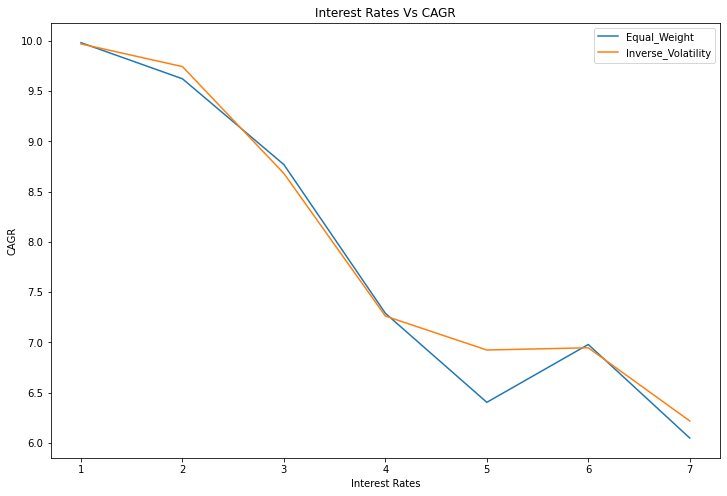

In [74]:
equal_weight_strategy_df = strategy_stats_params_df[strategy_stats_params_df['strategy_name'] == 'Equal_Weight']
inverse_volatility_strategy_df = strategy_stats_params_df[strategy_stats_params_df['strategy_name'] == 'Inverse_Volatility']
top5_strategy_df = strategy_stats_params_df[strategy_stats_params_df['strategy_name'] == 'Top5']

plt.figure(figsize=(12,8))
plt.plot(equal_weight_strategy_df['Interest Rate'], 
         equal_weight_strategy_df['cagr'], 
         label='Equal_Weight')
plt.plot(inverse_volatility_strategy_df['Interest Rate'], 
         inverse_volatility_strategy_df['cagr'], 
         label='Inverse_Volatility')
plt.xlabel('Interest Rates')
plt.ylabel('CAGR')
plt.title('Interest Rates Vs CAGR')
plt.legend()
plt.show()

### Inflation Based Trading Strategy

In [85]:
def inflation_based_strategy_computation(target_inflation_metric, strategies):
    
    # Initialize empty lists
    lst_inflation = []
    lst_year = []
    lst_cagr = []
    lst_sharpe = []
    lst_sortino = []
    lst_strategy = []

    for bt_strategy in strategies:
                
        inflation_from, inflation_to = int(target_inflation_metric), round(target_inflation_metric)
        if(inflation_from == inflation_to):
            inflation_from = interest_from + 1

        # Target Years Based on the Interest Rates
        target_years = year_wise_df[year_wise_df['Inflation'].between(inflation_from, inflation_to)][
            'Year'].sort_values(ascending=False)
        target_year_list = target_years.to_list()

        # Run a loop across target
        for yr in target_years:
            start_date = str(yr) + '-01-01'
            end_date = str((yr+1)) + '-01-01'

            if (bt_strategy.name == 'Top5'):
                price_data = fetch_price_data(usa_inflation_interest_df[usa_inflation_interest_df['Year']==yr]['Top5'], start_date)
            else:
                price_data = fetch_price_data(index_tickers, start_date)

            bt_backtest = bt.Backtest(bt_strategy, price_data)
            bt_res = bt.run(bt_backtest)

            #bt_res.plot(title="Index Equal Weight Strategy")
            #plt.show()

            bt_stats = bt_res.stats
            lst_inflation.append(target_interest_metric)
            lst_strategy.append(bt_strategy.name)
            lst_year.append(yr)
            lst_cagr.append(round(bt_stats.loc['cagr'][bt_strategy.name] * 100, 2))
            lst_sharpe.append(round(bt_stats.loc['daily_sharpe'][bt_strategy.name], 2))
            lst_sortino.append(round(bt_stats.loc['daily_sortino'][bt_strategy.name], 2))

    return pd.DataFrame(list(zip(lst_inflation, lst_strategy, lst_year, lst_cagr, lst_sharpe, lst_sortino)),
                     columns=['Inflation', 'strategy_name', 'year', 'cagr', 'sharpe', 'sortino'])


In [ ]:
inflation_strategy_df = pd.DataFrame(columns=['Inflation', 'strategy_name', 'year', 'cagr', 'sharpe', 'sortino'])
for interest_rate in range(1, 12):
    df2 = inflation_based_strategy_computation(interest_rate, [equal_weight_strategy, inverse_volatility_strategy, top5_strategy])
    inflation_strategy_df = pd.concat([inflation_strategy_df, df2])
inflation_strategy_df

In [ ]:
strategy_stats_params_df = pd.pivot_table(inflation_strategy_df, values=['cagr', 'sharpe', 'sortino'], index=['Inflation', 'strategy_name'],
                    aggfunc={'cagr': np.mean,
                             'sharpe': np.mean,
                             'sortino': np.mean
                            }).reset_index()

In [ ]:
equal_weight_strategy_df = strategy_stats_params_df[strategy_stats_params_df['strategy_name'] == 'Equal_Weight']
inverse_volatility_strategy_df = strategy_stats_params_df[strategy_stats_params_df['strategy_name'] == 'Inverse_Volatility']
top5_strategy_df = strategy_stats_params_df[strategy_stats_params_df['strategy_name'] == 'Top5']

plt.figure(figsize=(12,8))
plt.plot(equal_weight_strategy_df['Interest Rate'], 
         equal_weight_strategy_df['cagr'], 
         label='Equal_Weight')
plt.plot(inverse_volatility_strategy_df['Interest Rate'], 
         inverse_volatility_strategy_df['cagr'], 
         label='Inverse_Volatility')
plt.xlabel('Interest Rates')
plt.ylabel('CAGR')
plt.title('Interest Rates Vs CAGR')
plt.legend()
plt.show()